### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [4]:
%%bash 
git status

On branch master

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)
	new file:   prompt.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	data/
	images/



In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

C:\Users\Jeff\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [43]:
data = pd.read_csv('data/coupons.csv')

In [12]:
data.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [29]:
print(data[data['Bar'].isna()]['age'].unique())

['50plus' '41' '26' '31' '36' '21']


2. Investigate the dataset for missing or problematic data.

In [11]:
print(data.shape)
data.isna().sum()

(12684, 26)


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

For now I won't remove any data since just broadly culling rows with missing car data essentially removes all of it. I can write a function later to slice the df to remove NAN later anyways.

4. What proportion of the total observations chose to accept the coupon? 



In [37]:
Accept = data['Y'].value_counts()[0]
Accept/data['Y'].value_counts().sum()

0.4315673289183223

5. Use a bar plot to visualize the `coupon` column.

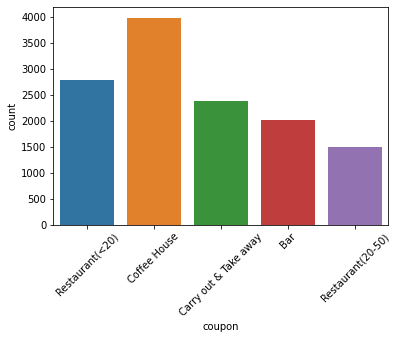

In [62]:
ax = sns.countplot(data = data, x = 'coupon')
ax.tick_params(axis='x', rotation=45)

6. Use a histogram to visualize the temperature column.

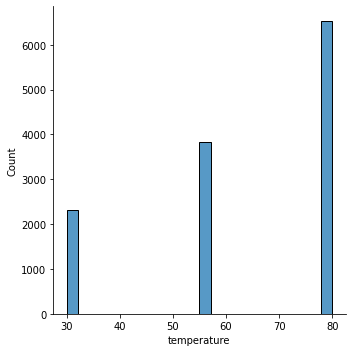

In [63]:
ax = sns.displot(data = data, x = 'temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [69]:
data_bar = data.loc[data['coupon'] == 'Bar']
data_bar

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [229]:
accepted_bar = data_bar['Y'].value_counts().get(key = 1)
proportion = accepted_bar/data_bar['Y'].value_counts().sum()
print(accepted_bar, proportion)

827 0.41001487357461575


DEFINE A FUNCTION TO CALCULATE THE PROPORTION ACCEPTED GIVEN A DATAFRAME

RETURNS NULL IF PASSED EMPTY DF

In [457]:
def proportion_accept(df):
 if df.empty == False: 
     accepted= df['Y'].value_counts().get(key = 1)
     total = df['Y'].value_counts().sum()
     proportion = accepted/total
     return proportion
 return None

In [231]:
data_nobarna['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [232]:
data_nobarna['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [233]:
data_nobarna = data.dropna(axis = 0, subset = ['Bar'])
df_3orfewer = data_nobarna.loc[data_nobarna['Bar'].isin(['never', 'less1', '1~3'])]
df_3ormore = data_nobarna.loc[data_nobarna['Bar'].isin(['gt8', '1~3'])]

print(proportion_accept(df_3orfewer), proportion_accept(df_3ormore))


0.562051649928264 0.6162296243798724


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [234]:
df_1ormore_andgt25 = data_nobarna.loc[~data_nobarna['Bar'].isin(['never', 'less1']) & ~data_nobarna['age'].isin(['21', 'below21'])]
print(proportion_accept(df_1ormore_andgt25), proportion_accept(data))

0.6215340295282679 0.5684326710816777


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [235]:
print(data['passanger'].unique(), data['income'].unique())

['Alone' 'Friend(s)' 'Kid(s)' 'Partner'] ['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
 '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']


In [236]:
ans5 = data_nobarna.loc[~data_nobarna['passanger'].isin(['Kid(s)']) & ~data_nobarna['occupation'].isin(['Farming Fishing & Forestry']) & ~data_nobarna['Bar'].isin(['never', 'less1'])]
print(proportion_accept(ans5))

0.6231060606060606


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [237]:
data_dropna = data.dropna(axis = 0, subset = ['Bar', 'RestaurantLessThan20'])
point1 =  data_dropna.loc[~data_dropna['Bar'].isin(['never', 'less1']) & ~data_dropna['passanger'].isin(['Kid(s)']) & ~(data_dropna['maritalStatus'] == 'Widowed')]
point2 = data_dropna.loc[~data_dropna['Bar'].isin(['never', 'less1']) & data_dropna['age'].isin(['21', 'below21', '26'])]
point3 = data_dropna.loc[~data_dropna['RestaurantLessThan20'].isin(['never', 'less1', '1~3']) & data_dropna['income'].isin(['$37500 - $49999','$12500 - $24999','$25000 - $37499', 'Less than $12500' ])]
print(point3['RestaurantLessThan20'])
print(proportion_accept(point1), proportion_accept(point2),proportion_accept(point3))

0        4~8
1        4~8
2        4~8
3        4~8
4        4~8
        ... 
12541    4~8
12542    4~8
12543    4~8
12544    4~8
12545    4~8
Name: RestaurantLessThan20, Length: 2257, dtype: object
0.6231060606060606 0.628080985915493 0.6025697828976517


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [238]:
data['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar',
       'Restaurant(20-50)'], dtype=object)

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

I'm going to investigate people who accepted the coupon for Coffee House 

First we subset the data to those who accepted coffeehouse

In [239]:
data_coffee = data.loc[data['coupon'] == 'Coffee House'].dropna(axis= 0, subset = ['CoffeeHouse'])
proportion_accept(data_coffee)

0.5

In [240]:
print(data_coffee['Y'].value_counts().sort_values()[0])

1962


In [ ]:
print(data_coffee.loc[data_coffee['CoffeeHouse'] == 'never']['Y'].value_counts())

We do some preliminary exploration using a function I wrote to calculate the proportion of accepted. 

In [242]:
accepton_coffeefreq = {}

for key in data_coffee['CoffeeHouse'].unique():
 accepton_coffeefreq[key] = proportion_accept(data_coffee.loc[data_coffee['CoffeeHouse'] == key])

print(accepton_coffeefreq)
 

{'never': 0.18878101402373246, 'less1': 0.48186046511627906, '4~8': 0.6858736059479554, '1~3': 0.6477927063339731, 'gt8': 0.6578947368421053}


It seems to work fine. So let's iterate through all the columns and each unique category in those columns and calculate the proprtion of people who accepted a coffee coupon 

In [303]:


totaldata = {}
columnnames = list(data_coffee_dropna.columns)
columnnames.remove('Y')
columnnames.remove('car')
#print(columnnames)
for column in columnnames:
    data_coffee_dropna = data_coffee.dropna(axis = 0, subset = [column])
    accepton_column = {}
    #print('column ',column)
    for key in data_coffee_dropna[column].unique():
     #print('key', key)
     accepton_column[key] = proportion_accept(data_coffee_dropna.loc[data_coffee_dropna[column] == key])
    #print(key)
     data_dict = pd.DataFrame.from_dict(accepton_column, orient = 'index', columns = ['accept_frac'])
     totaldata[column] = data_dict#.rename(columns = {0: 'accept_frac'}, inplace = True)
print(totaldata)
 

{'destination':                  accept_frac
No Urgent Place     0.581715
Home                0.364435
Work                0.445676, 'passanger':            accept_frac
Friend(s)     0.599170
Kid(s)        0.482759
Alone         0.438091
Partner       0.572881, 'weather':        accept_frac
Sunny     0.504256
Rainy     0.524664
Snowy     0.431973, 'temperature':     accept_frac
80     0.530681
55     0.455706
30     0.444805, 'time':       accept_frac
10AM     0.639456
2PM      0.549422
6PM      0.413471
7AM      0.445676
10PM     0.431507, 'coupon':               accept_frac
Coffee House          0.5, 'expiration':     accept_frac
2h     0.432432
1d     0.584721, 'gender':         accept_frac
Female     0.494587
Male       0.505814, 'age':          accept_frac
21          0.523322
46          0.513636
26          0.516129
31          0.482927
41          0.498452
50plus      0.417132
36          0.470437
below21     0.696774, 'maritalStatus':                    accept_frac
Unmarried p

Do some checking to make sure the DF that stores all our accepted coffee coupon data is behaving properly by checking one of the original columns, age. 

In [314]:
totaldata['age'].reset_index()

,index,accept_frac
0,21,0.523322
1,46,0.513636
2,26,0.516129
3,31,0.482927
4,41,0.498452
5,50plus,0.417132
6,36,0.470437
7,below21,0.696774


There's 24 different columns that I investigated so we iteratively generate 24 bar plots of each column and the accept rate of categories within that column/data name. The red line represents the average rate of coffee house coupon acceptance. 

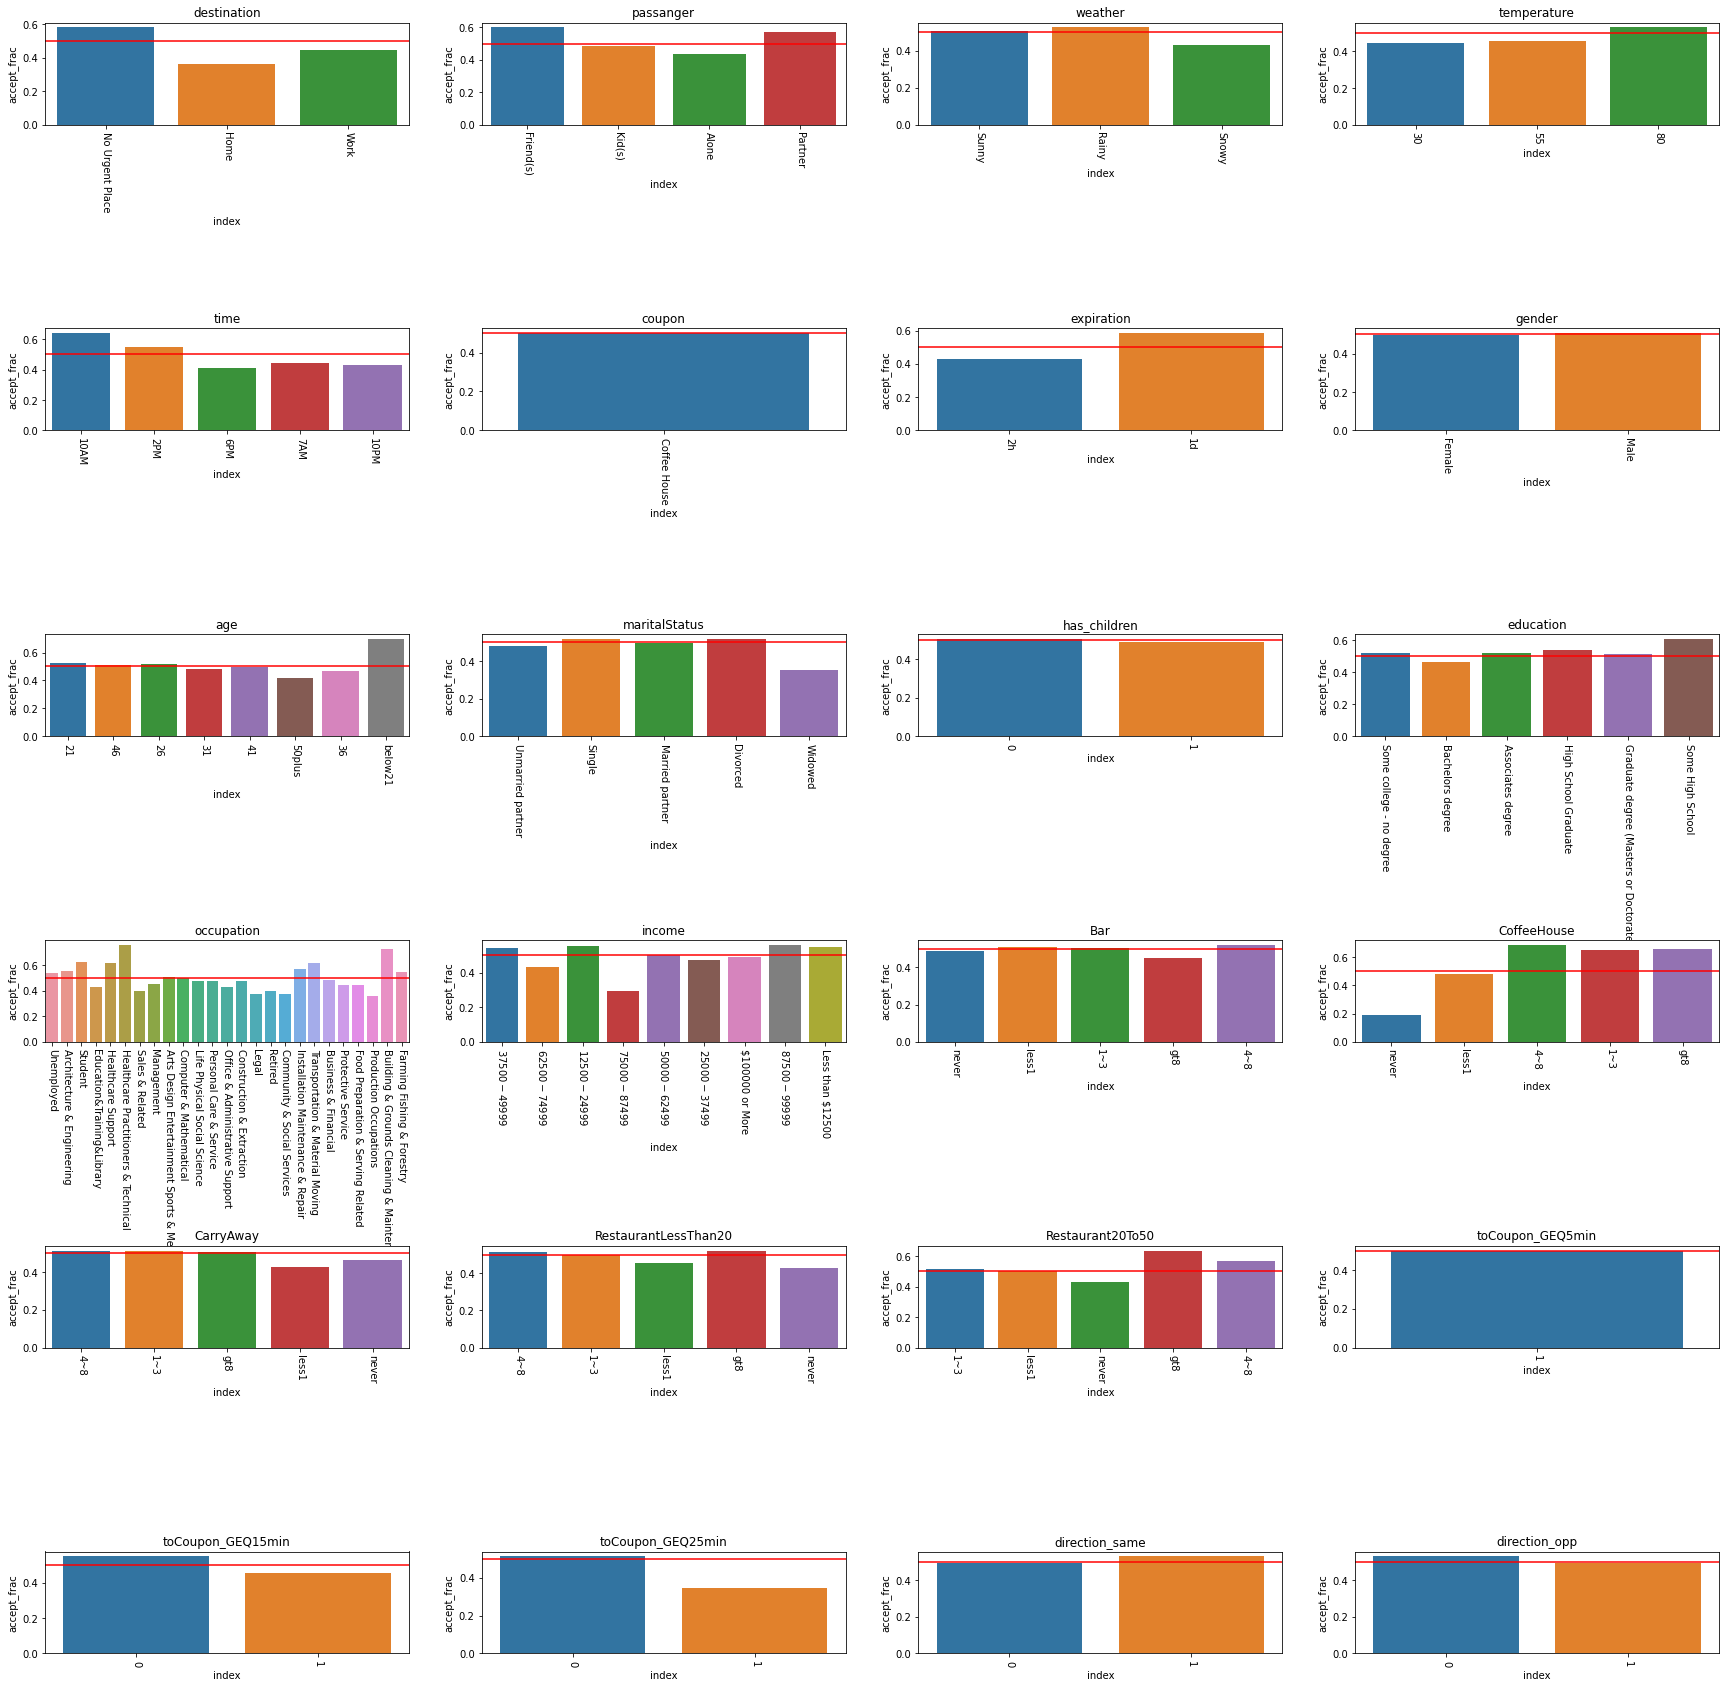

In [336]:
fig = plt.figure()
fig.subplots_adjust(hspace=2, wspace =.2)
n=1
for column in list(totaldata.keys()):
    ax = fig.add_subplot(6, 4, n)
    sns.barplot(data = totaldata[column].reset_index(),x ='index', y = 'accept_frac',ax = ax).set(title=column)
    plt.axhline(y = 0.5, color = 'r', linestyle = '-')
    ax.tick_params(axis='x', rotation=-90)
    n+= 1


fig.set_size_inches(30, 30)
plt.show()


We see that there are a few standout behaviors that suggest very high rates of acceptence. For example, being in healthcare for occuption. However, this is a 1D analysis. Lets do an NxN Bayesian analysis next. Asking the question: "Given a list of single-attribute groups that have the highest coupon acceptence rate, what is the acceptance rate of people that satisfy two categories of these highest coupon acceptence rate attributes?" 

Compute the attributes that give the maximum probability of coffee house coupon acceptance and store as a new dataframe

In [383]:
maxvaluedf = pd.DataFrame()

maxvalues_df =[]

datacolumn.loc[datacolumn['accept_frac'] == datacolumn['accept_frac'].max()]
for column in list(totaldata.keys()): 
    datacolumn = totaldata[column].reset_index()
    maxvaluedf = datacolumn.loc[datacolumn['accept_frac'] == datacolumn['accept_frac'].max()]
    maxvaluedf['column'] = column
    #print(maxvaluedf)
    maxvalues_df.append(maxvaluedf)
maxvalues_df = pd.concat(maxvalues_df)
# maxvalues_df = maxvalues_df.append(maxvalues_df)
print(maxvalues_df)

                                  index  accept_frac                column
0                       No Urgent Place     0.581715           destination
0                             Friend(s)     0.599170             passanger
1                                 Rainy     0.524664               weather
0                                    80     0.530681           temperature
0                                  10AM     0.639456                  time
0                          Coffee House     0.500000                coupon
1                                    1d     0.584721            expiration
1                                  Male     0.505814                gender
7                               below21     0.696774                   age
3                              Divorced     0.517483         maritalStatus
1                                     0     0.505618          has_children
5                      Some High School     0.607143             education
5  Healthcare Practitione

C:\Users\Jeff\AppData\Local\Temp/ipykernel_9176/577566737.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maxvaluedf['column'] = column


shaping the DF and fixing some problems with index

In [390]:
#given this matrix of highprobability events, NxN bayesian analysis. 
maxvalues_df2= maxvalues_df.reset_index()[['index','column', 'accept_frac']]
maxvalues_df2['tuple'] = maxvalues_df2['index'].astype(str) + ':'+  maxvalues_df2['column']
print(maxvalues_df2)


                                   index                column  accept_frac  \
0                        No Urgent Place           destination     0.581715   
1                              Friend(s)             passanger     0.599170   
2                                  Rainy               weather     0.524664   
3                                     80           temperature     0.530681   
4                                   10AM                  time     0.639456   
5                           Coffee House                coupon     0.500000   
6                                     1d            expiration     0.584721   
7                                   Male                gender     0.505814   
8                                below21                   age     0.696774   
9                               Divorced         maritalStatus     0.517483   
10                                     0          has_children     0.505618   
11                      Some High School            

Compute the probability of accepting a coffee coupon given a group of people that satisfy two high probability attributes 
ex: 
people in healthcare profession AND people that go to a coffee house 4-8 times a month

In [447]:

maxbayes = pd.DataFrame(columns = ['unit1_', 'unit1_index','unit2_', 'unit2_index','accept_rate', 'events' ])
n= 0
for unit1 in maxvalues_df2['column']:
    for unit2 in maxvalues_df2['column']:
        data_temp = data_coffee.dropna(axis = 0, subset = [unit1, unit2])
        unit1_index = maxvalues_df2.loc[maxvalues_df2['column'] == unit1]['index'].values[0]
        unit2_index = maxvalues_df2.loc[maxvalues_df2['column'] == unit2]['index'].values[0]
        slicedframe = data_coffee.loc[(data_coffee[unit1] == unit1_index) & (data_coffee[unit2] == unit2_index)]
        events = slicedframe.shape[0]
        bayes_accept = proportion_accept(slicedframe)
        maxbayes.loc[len(maxbayes.index)] = [unit1, str(unit1_index) + ':'+str(unit1), unit2, str(unit2_index) + ':'+str(unit2), bayes_accept, events]

        


print(maxbayes.isna().sum())

unit1_          0
unit1_index     0
unit2_          0
unit2_index     0
accept_rate    44
events          0
dtype: int64


Shape DF to create a heatmap colored by the probability of accepting a coupon and annotated with the number of observations of that type of individual just in case a single/few person(s) comprises that category. NULL values are white (instances where no individual satisfies both conditions). 

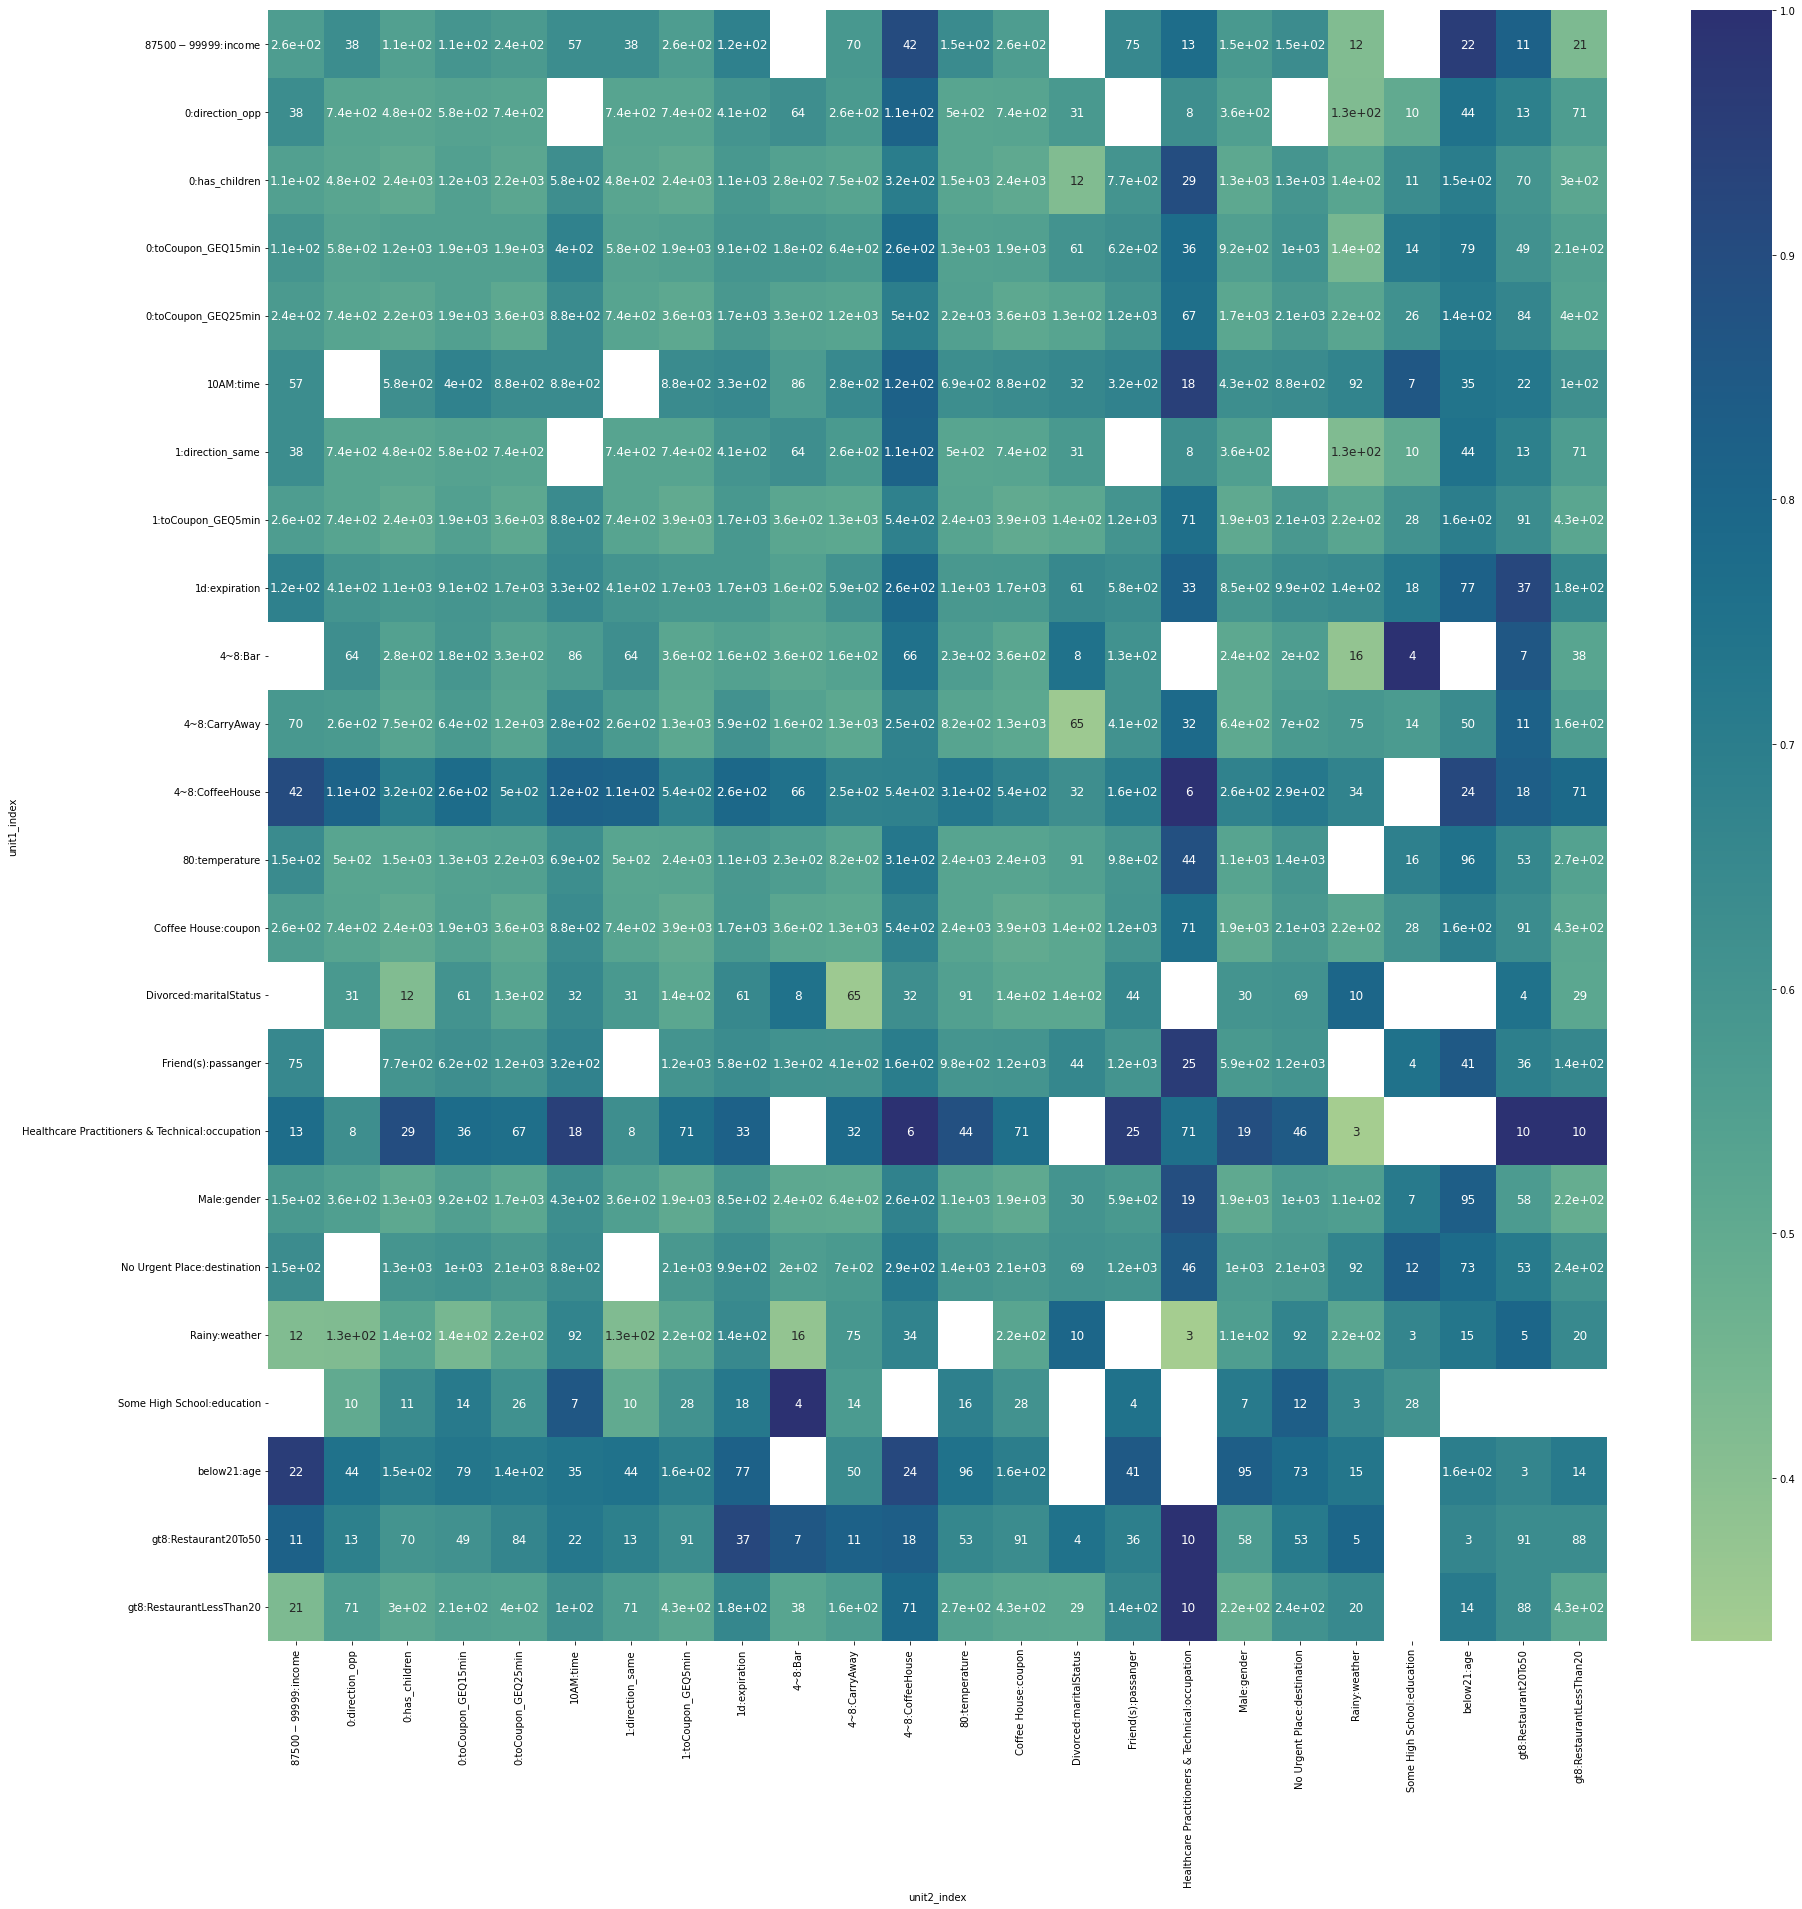

In [461]:
fig = plt.figure()
heatmapdata = maxbayes[['unit1_index', 'unit2_index', 'accept_rate']].pivot(index = 'unit1_index', columns = 'unit2_index', values = 'accept_rate')
observations =  maxbayes[['unit1_index', 'unit2_index', 'events']].pivot(index = 'unit1_index', columns = 'unit2_index', values = 'events')
sns.heatmap(heatmapdata, cmap="crest",xticklabels=True, yticklabels=True ,annot=observations, annot_kws={"fontsize":12})
fig.set_size_inches(30, 30)

In [469]:
%%bash 
git config

usage: git config [<options>]

Config file location
    --global              use global config file
    --system              use system config file
    --local               use repository config file
    --worktree            use per-worktree config file
    -f, --file <file>     use given config file
    --blob <blob-id>      read config from given blob object

Action
    --get                 get value: name [value-pattern]
    --get-all             get all values: key [value-pattern]
    --get-regexp          get values for regexp: name-regex [value-pattern]
    --get-urlmatch        get value specific for the URL: section[.var] URL
    --replace-all         replace all matching variables: name value [value-pattern]
    --add                 add a new variable: name value
    --unset               remove a variable: name [value-pattern]
    --unset-all           remove all matches: name [value-pattern]
    --rename-section      rename section: old-name new-name
    --remove-secti

CalledProcessError: Command 'b'git config\n'' returned non-zero exit status 129.